# Objective: To build Recommendation system  for amazon users who purchase electronics goods from amazon:


## Introduction:

### Business objective: 
   1. To Retain the customers.
   2. To connect like kinded product sellers and buyers.
   3. To recommend the buyers whose profile or purshace history is not available.
   4. To also have a recommendation system for users when a similar kind of buying platform is launched newly(where profile of users not available).
   5. To do cross selling.
   6. To recommend the users by Connecting like minded users.
   7. To incraese the slling rate of sellers by directly targetting the needed customers.

### Recommendation Systems (RS):

  To fulfill the above business requierments there are various recommendation systems as follows:
  
  1. Popularity Based RS.
  2. Classification Based RS.
  3. Content Based RS.
  4. Nearset Neighbours based RS
      a. User - User based
      b. Item - Item based
  5. Hierarchical RS.  

#### Importing all necessary fles:

In [1]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd #For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data. 
from sklearn.model_selection import train_test_split # To do cross_validation on the model to check its performance.
from scipy.sparse.linalg import svds #To perform Singular value Decompositon in collobrative filtering.
from surprise import KNNWithMeans #To build Collobrative Recommendation System.
from surprise import accuracy #To vaildate the performance of the built recomendation sys using the accuracy class available from suprise package.
from surprise import Reader  #The Reader class is used to parse a file containing ratings
from surprise import Dataset #This isused to load the dataset containing the dataset for building recommendation system.
import warnings; warnings.filterwarnings(action='ignore') #This can avoid the file - warnings while running the cells.
# The following is to print all the output in the cells instead of printing the last output allone: 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### a. Reading the data file:

In [2]:
#Importing the datafile containing the user, item and rating data in the dataframe format:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('ratings_Electronics.csv',header=None)

In [3]:
df.head() #Printing the data. 

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


##### Inference on the below output:
1. The datafile containing the necessary data to build the recommendation system is read as dataframe format.
2. The attribute 0 shows the user_ids.
3. The attribute 1 shows the item_ids.
4. The attribute 2 shows the ratings.
5. The attribute 3 shows the time at which the rating was given, which is not necessary for our project here so it need to be dropped.
6. Building the recomendation system with above attribute names is difficult, whose names should also to be changed.

#### b. Dropping and Renaming the attributes:

In [4]:
df.drop(3,axis=1,inplace=True) # Dropping the attribute 3 which is containing the timestamp.
df.head()

,0,1,2
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


##### Inference on the below output:
1. The attribute containing the timestamo data is dropped.
2. Therefore, we contain only data on user id, item id and rating of the products given by user. 

In [5]:
df = df.rename(columns={0:'uid', 1:'iid', 2:'Ratings' }) # Renaming the attribute's names as requiered.
df.head()

,uid,iid,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


##### Inference on the below output:
1. The attributes which had names as 0,1 and 2 are renamed as uid, iid and ratings respectively.
2. Proceeding the recommendation system with this names is much more comfortable to previous names.

#### b. Understanding the data:

In [6]:
df.info() # Understanding the informations about the Data and type of attributes of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
uid        object
iid        object
Ratings    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


##### Inference on the output:
1. There are 7824482 records in the data with 3 atributes for each record.
2. Except Ratings columns all other columns are in the form of categorical type because they are object datatypes.
3. Ratings are in the float type and it belongs to Discrete data type.

#### 1. Summary Statistics :

The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [7]:
df.describe(include = 'all') #Descriptive Stats

,uid,iid,Ratings
count,7824482,7824482,7.824482e+06
unique,4201696,476002,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN
freq,520,18244,NaN
mean,NaN,NaN,4.012337e+00
std,NaN,NaN,1.380910e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,3.000000e+00
50%,NaN,NaN,5.000000e+00
75%,NaN,NaN,5.000000e+00


##### Five Point summary visualization:

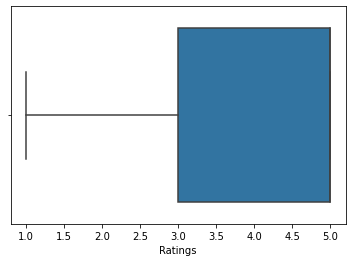

In [8]:
sns.boxplot(df['Ratings'])  # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.

##### Inference on the outputs:
1. In the above table we can find the complete descriptive statistics for 'Ratings' attribute alone.
2. For other attributes the summary statistics is not available because they are non quantitative type.

Five point summary can be taken from the above displayed table and box plot .
For eg let us take attribute Rating	:
 1. minimum rating  - 1.
 2. 25% quartiles - 3.
 3. 50% quartiles(median) - 5.
 4. 75% quartiles - 5.
 5. max - 5.
 
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take Ratings:
  1. Measure of central tendancy here is medain(50%) - 5.
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 4.
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 2.
     
     c. Std Dev (Average distance/How far the data is distributed from the mean) - 1.38.

#### The five point summary was also visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles. The data contains large amount of records with ratings between 3 to 4.


#### 2. : Understanding the Rating attribute:

In [9]:
df['Ratings'].value_counts() #To know the number of records in the each rating.

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

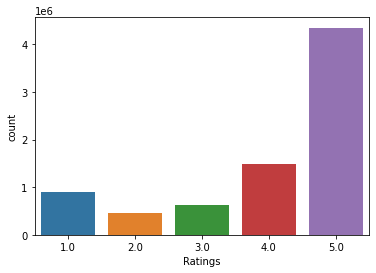

In [10]:
sns.countplot(df['Ratings']) #Plotting the Rating attribute to visualze the imbalance.


##### Inference on the output:
1. There is imbalance in the data.
2. The data contains the recors of Rating - 5 larger than the other ratings.
3. The data contains the recors of Rating - 3 lesser than the other ratings.
4. This can be seen in two ways: (For example)
    a. The records on user who had provided five star rating is more (or)
    b. The records on items who had got five star rating is less.

#### 3. : Understanding the number of unique users and items:

In [11]:
df['uid'].nunique()

4201696

In [12]:
df['iid'].nunique()

476002

##### Inference on the output:
1. The number of users in the data are about Fourty two lakhs users.
2. The number of items in the data are about Four lakhs lakhs items.

## Data Pre-Processing:

#### 1.: Dealing with missing values:

In [13]:
df.isnull().values.any()

False

##### Inference on the output:
 The data containd no missing values.

#### 2.: Making data less sparse/denser:
   
    As the data is huge, the following steps make the data less denser by extracting only the users who have rated more than 50 items.

In [14]:
uid_vc = df['uid'].value_counts() #This gives the number of items each user has rated
len(uid_vc[uid_vc >= 50]) #To know the number of users who has rated more than 50 products.

1540

In [15]:
df_s = df[df['uid'].isin(uid_vc[uid_vc >= 50].index)] #Extracting the records of the 1540 users alone.
df_s 

,uid,iid,Ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [16]:
df_s.reset_index(inplace=True) #Resetting the index from zero.

In [17]:
df_s.drop('index',axis=1,inplace=True) #Dropping the index.
df_s

,uid,iid,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
125866,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
125867,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
125868,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
125869,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


##### Inference on the output:
1. The number of users who has rated more than 50 items is 1540 users.
2. Total number of records accouts more than one lakh. 

#### 3. : Understanding the number of unique users and items:

In [18]:
df_s['uid'].nunique()

1540

In [19]:
df_s['iid'].nunique()

48190

##### Inference on the output:
1. The number of users in the data are about Thousand Five hundred and eighty users.
2. The number of items in the data are about Fourty eight thousand one hundred and ninty items.
     Therefor number of users and items are greatly reduced.

#### 4. : Understanding the Rating attribute:

In [20]:
df_s['Ratings'].value_counts() #To know the number of records in the each rating.

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Ratings, dtype: int64

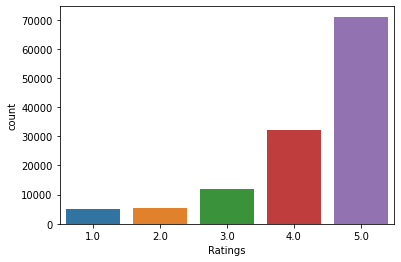

In [21]:
sns.countplot(df_s['Ratings']) #Plotting the no. of records as per the Ratings attribute.


##### Inference on the output:
1. There is imbalance in the data.
2. The data contains the recors of Rating - 5 larger than the other ratings.
3. The data contains the recors of Rating - 3 lesser than the other ratings.
4. This can be seen in two ways: (For example)
    a. The records on user who had provided five star rating is more (or)
    b. The records on items who had got five star rating is less.
5. After making the data less denser also the imbalance is not reduced.

#### 5. : Understanding the No. of Ratings per product:

In [22]:
iid_group = df_s.groupby('iid')['Ratings'].count() #Grouping the proucts and thier ratings
iid_sorted = iid_group.reset_index().rename(columns={'Ratings': 'No.of_ratings_per_iid'}).sort_values(by= ['No.of_ratings_per_iid','iid'], ascending = [0,1])
iid_sorted

,iid,No.of_ratings_per_iid
39003,B0088CJT4U,206
24827,B003ES5ZUU,184
11078,B000N99BBC,167
38250,B007WTAJTO,164
38615,B00829TIEK,149
...,...,...
48182,B00L8QCVL6,1
48184,B00LBZ1Z7K,1
48185,B00LED02VY,1
48186,B00LGN7Y3G,1


In [23]:
iid_group

iid
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
             ..
B00LED02VY    1
B00LGN7Y3G    1
B00LGQ6HL8    5
B00LI4ZZO8    2
B00LKG1MC8    1
Name: Ratings, Length: 48190, dtype: int64

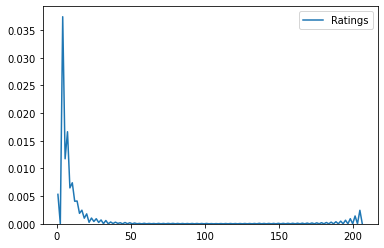

In [24]:
sns.kdeplot(iid_group) #Creating Density plot

##### Inference on the output:
1. From the above density plots it can be observed that there are large number of products that has got more about zero to fifty customer ratings.
2. There are also few products which as got around 200 customer ratings

#### 6.: Splitting  the dataset:

In [28]:
train_df, test_df = train_test_split(df_s, test_size = 0.3, random_state = 1) #Data is split into training and testing data with testing data containing 30% of whole data.

In [29]:
train_df.shape

(88109, 3)

In [30]:
test_df.shape

(37762, 3)

##### Inference on the above output:
1. Data is split using the "train_test_split" function available in the sklearn package.
2. Thirty percentage of data is split as testing data.

======================================================================================================================

## Building Recommendation Systems:

### Popularity based recommendation:

         1. This recommendation system recommends only popular products to irrespective of any kind of user.
         2. This type of recommendation system will be useful in business that do not create profile of uers and products.
         3. This system also avoids the cold-start problem when business like new e-commerse site is launched. 

#### Method - 1: Building Popularity based Recommendation System based on the Mean Rating:
                This type of recommendation system might be useful if the e-commerse business is satisfied to recommend only the popularly purchased products. But this cant be used durung the inital start of the business because it requieres rating for the products. If this need to be used during the start of a business then it is necessary to obtain the star ratings from other websites and use here or undergo some influential strategies.

#### Step 1: Creating the mean-rating:
        In this step we will create mean rating for all the iids

In [31]:
mean_ratings = pd.DataFrame(df_s[['iid','Ratings']]) #Fetching the IIDs and respective Ratings.
mean_ratings

,iid,Ratings
0,0594451647,5.0
1,0594481813,3.0
2,0970407998,1.0
3,0970407998,4.0
4,0972683275,5.0
...,...,...
125866,B00LGQ6HL8,5.0
125867,B00LGQ6HL8,5.0
125868,B00LI4ZZO8,4.0
125869,B00LI4ZZO8,5.0


In [32]:
#Creating mean rate:
mean_rate = pd.DataFrame(mean_ratings.groupby('iid')['Ratings'].mean().reset_index())
mean_rate = mean_rate.rename(columns = {'Ratings':'mean_ratings'})
mean_rate

,iid,mean_ratings
0,0594451647,5.000000
1,0594481813,3.000000
2,0970407998,2.500000
3,0972683275,4.750000
4,1400501466,3.333333
...,...,...
48185,B00LED02VY,4.000000
48186,B00LGN7Y3G,5.000000
48187,B00LGQ6HL8,5.000000
48188,B00LI4ZZO8,4.500000


In [33]:
#Sorting the ratings and items in descending order:
mean_rate = mean_rate.sort_values(by= ['mean_ratings','iid'], ascending = [0,1])
mean_rate.head(10)

,iid,mean_ratings
0,0594451647,5.0
5,1400501520,5.0
12,1400699169,5.0
13,1685560148,5.0
14,3744295508,5.0
16,787988002X,5.0
17,8862935307,5.0
21,9573212919,5.0
23,9800359788,5.0
26,9981739588,5.0


##### Inference on the output:
1. Initially the prouct ids and ratings were fetched.
2. Mean ratings for each product was claculated.
3. Then the items were sorted in descending order so that we get products with highest mean rating at the top.
4. The products at the top can be recommended to the customers as popularly purchased products.

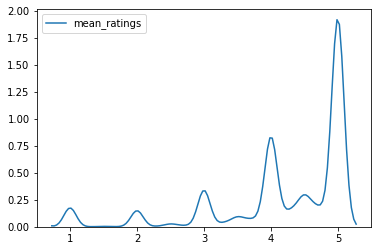

In [34]:
sns.kdeplot(mean_rate['mean_ratings']) #Visualizing the density of the products based on mean ratings.

##### Inference on the output:
1. It can be noticed that there are large number of products with mean rating betweenn 3.5 to 5.
2. There are only very minimum products with mean rating of 1 and 2.
     Therefore the products we will recommend as popularly purchased would have got modtly Rating of 5.

#### Step 2: Building the Recommender:

In [35]:
#Creating the function that will collect the top n products at the top mean ratings and list it to the consumer:
def recommendation_poprs(user_id, num_recomendations):
    user_recomendation = mean_rate.head(num_recomendations)
    user_recomendation['user_id'] = user_id
    col = user_recomendation.columns.tolist()
    cols =  col[-1:] + col[:-1]
    user_recomendation = user_recomendation[cols]
    return pd.DataFrame(user_recomendation[['user_id','iid']])

In [36]:
recommendation_poprs('14P637', 5) #Calling the recommender function by inputing the user id and no.of recommendation to be made to the cunsumer.

,user_id,iid
0,14P637,0594451647
5,14P637,1400501520
12,14P637,1400699169
13,14P637,1685560148
14,14P637,3744295508


##### Inference on the output:
1. The recommeder system that can fetch the products that are getting highest mean ratings from the users is built.
2. Those fetched products are shown to the consumers to influence them that those are the products that are moving fast in trend and recommend them to purchase the same by saying them the product is also going out-off stock.

____________________________________________________________________________________________________________________________

#### Method - 2: Building Popularity based Recommendation System based on the frequently purchased products :
                In This type of recommendation system products that are more commonly purchased or most commonly purchased is recommended to the users. This type of recommendation system can avoid cold-start problems in the new business of e-commerce. In the below steps this type of system is built in three types as follows:
                1. With Whole data:
                2. Splitting the data into Training data and Testing data.
                

###### Note:
1. In this type of recommendation system we dont involve in building the model so that to validate the model, here training and testing data is used just to check and visualize the behaviour of the system

##### Popularity based Recommendation System for Whole Data :

#### Step 1: No. of purchases per product (mentioned as score in the table):

In [37]:
dff_grouped = df_s.groupby(by='iid').agg({'uid': 'count'}).reset_index() #Fetching the number of purchases per product.
dff_grouped.rename(columns = {'uid': 'score'},inplace=True) #Assigning the number of purchases for each product as score value for the respective products.
dff_grouped.head(10)

,iid,score
0,0594451647,1
1,0594481813,1
2,0970407998,2
3,0972683275,4
4,1400501466,6
5,1400501520,1
6,1400501776,2
7,1400532620,2
8,1400532655,6
9,140053271X,2


In [38]:
dff_grouped = dff_grouped.sort_values(['score','iid'],ascending = [0,1]) #Sorting the items based on the scores.
dff_grouped

,iid,score
39003,B0088CJT4U,206
24827,B003ES5ZUU,184
11078,B000N99BBC,167
38250,B007WTAJTO,164
38615,B00829TIEK,149
...,...,...
48182,B00L8QCVL6,1
48184,B00LBZ1Z7K,1
48185,B00LED02VY,1
48186,B00LGN7Y3G,1


##### Inference on the output:
1. The products were grouped to fetch the number of purchases per product.  
2. The items were sorted in the descending order based on the number of purchases so that the products that were most commonly purchased appears in the top.

#### Step 2: Ranking the products:
       Here the products are ranked with strategy of ranking the most purchased products as first rank.

In [39]:
dff_grouped['Rank'] = dff_grouped['score'].rank(ascending=0, method='first') #Ranking the scores.
dff_grouped

,iid,score,Rank
39003,B0088CJT4U,206,1.0
24827,B003ES5ZUU,184,2.0
11078,B000N99BBC,167,3.0
38250,B007WTAJTO,164,4.0
38615,B00829TIEK,149,5.0
...,...,...,...
48182,B00L8QCVL6,1,48186.0
48184,B00LBZ1Z7K,1,48187.0
48185,B00LED02VY,1,48188.0
48186,B00LGN7Y3G,1,48189.0


##### Inference on the output:
1. The products were ranked as said above.
2. It can be seen from the above table that there is no overlap in the score at the top order so that they get seperate rankings each.
3. But, the products overlap at lower score so tey get similar ranks.
4. Our concern is only at the top order products which will be recommended to the consumers because they are most consumed.

        Let us viualize the top 20 most commonly purchased product.

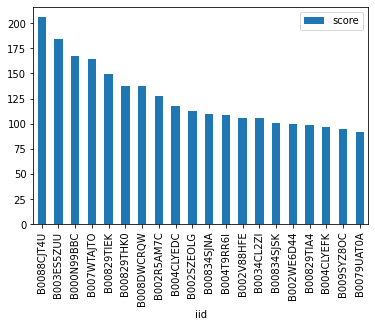

In [40]:
dff_grouped.head(20).plot(kind = "bar", x='iid', y='score') #Plotting the top-order products.

##### Inference on the output:
1. In the above plot it can be noticed that only one product that is purchased more.
2. There is lot of difference between the first most purchased and second most purchased product.
3. The difference between the most purchased products from third most purchased is not much higherr.

            Therefore, grouping of the products that have very little difference can be grouped and shown as a recommendatioin, similarly five or ten or requiered no.of recommendations can be made. Orelse, top most consumed products can be recommended induvidually.
            
            But in our system here products in the top order are induvidually recommended.

#### Step 3: Building the recommender:
       Here the products that are ranked top most is fetched upon calling the below function and recommend the same to the user id given while claiing the function. 

In [41]:
# A function is built here that fetches the product ids that are in the given n top order and recommended to the user:
def recommendation_poprs_dff(user_id, num_recomendations):
    user_recomendation = dff_grouped.head(num_recomendations)
    user_recomendation['user_id'] = user_id
    col = user_recomendation.columns.tolist()
    cols =  col[-1:] + col[:-1]
    user_recomendation = user_recomendation[cols]
    return pd.DataFrame(user_recomendation[['user_id','iid']])

In [42]:
recommendation_poprs_dff('14P637', 5) #Calling the recommender function by inputing the user id and no.of recommendation to be made to the cunsumer.

,user_id,iid
39003,14P637,B0088CJT4U
24827,14P637,B003ES5ZUU
11078,14P637,B000N99BBC
38250,14P637,B007WTAJTO
38615,14P637,B00829TIEK


##### Inference on the output:
1. The recommeder system that can fetch the products that are getting purchased most by the users is built.
2. Those fetched products are shown to the consumers to influence them that those are the products that are moving fast in trend and recommend them to purchase the same by saying them the product is also going out-off stock.

##### Popularity based Recommendation System for Training Data :

#### Step 1: No. of purchases per product (mentioned as score in the table):

In [43]:
df_grouped_train = train_df.groupby(by='iid').agg({'uid': 'count'}).reset_index() #Fetching the number of purchases per product.
df_grouped_train.rename(columns = {'uid': 'score'},inplace=True) #Assigning the number of purchases for each product as score value for the respective products.
df_grouped_train.head(10)

,iid,score
0,0594451647,1
1,0970407998,2
2,0972683275,2
3,1400501466,2
4,1400501520,1
5,1400501776,2
6,1400532620,2
7,1400532655,3
8,140053271X,2
9,1400599997,3


In [44]:
df_grouped_train = df_grouped_train.sort_values(['score','iid'],ascending = [0,1])
df_grouped_train

,iid,score
30797,B0088CJT4U,155
19529,B003ES5ZUU,124
8601,B000N99BBC,122
30194,B007WTAJTO,112
30489,B00829TIEK,100
...,...,...
38096,B00L5YZCCG,1
38098,B00LA6T0LS,1
38099,B00LED02VY,1
38100,B00LGN7Y3G,1


##### Inference on the output:
1. The products were grouped to fetch the number of purchases per product.  
2. The items were sorted in the descending order based on the number of purchases so that the products that were most commonly purchased appears in the top.

#### Step 2: Ranking the products:
       Here the products are ranked with strategy of ranking the most purchased products as first rank.

In [45]:
df_grouped_train['Rank'] = df_grouped_train['score'].rank(ascending=0, method='first') #Ranking the scores.
df_grouped_train

,iid,score,Rank
30797,B0088CJT4U,155,1.0
19529,B003ES5ZUU,124,2.0
8601,B000N99BBC,122,3.0
30194,B007WTAJTO,112,4.0
30489,B00829TIEK,100,5.0
...,...,...,...
38096,B00L5YZCCG,1,38100.0
38098,B00LA6T0LS,1,38101.0
38099,B00LED02VY,1,38102.0
38100,B00LGN7Y3G,1,38103.0


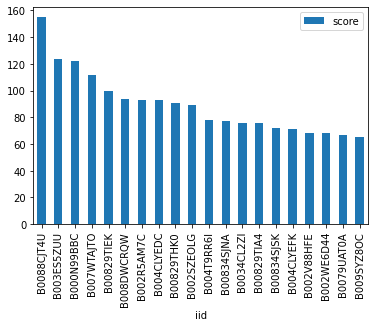

In [46]:
df_grouped_train.head(20).plot(kind = "bar", x='iid', y='score')

##### Inference on the output:
1. In the above plot it can be noticed that only one product that is purchased more.
2. There is lot of difference between the first most purchased and second most purchased product.
3. The difference between the most purchased products from third most purchased is not much higher.
4. The products in the top-orders of the training data seems to be same of the top-order of the whole data.

            Therefore, grouping of the products that have very little difference can be grouped and shown as a recommendatioin, similarly five or ten or requiered no.of recommendations can be made. Orelse, top most consumed products can be recommended induvidually.
            
            But in our system here products in the top order are induvidually recommended.

#### Step 3: Building the recommender:
       Here the products that are ranked top most is fetched upon calling the below function and recommend the same to the user id given while claiing the function. 

In [47]:
# A function is built here that fetches the product ids that are in the given n top order and recommended to the user:
def recommendation_poprstr(user_id, num_recomendations):
    user_recomendation = df_grouped_train.head(num_recomendations)
    user_recomendation['user_id'] = user_id
    col = user_recomendation.columns.tolist()
    cols =  col[-1:] + col[:-1]
    user_recomendation = user_recomendation[cols]
    return pd.DataFrame(user_recomendation[['user_id','iid']])

In [48]:
recommendation_poprstr('14P637', 5) #Calling the recommender function by inputing the user id and no.of recommendation to be made to the cunsumer.

,user_id,iid
30797,14P637,B0088CJT4U
19529,14P637,B003ES5ZUU
8601,14P637,B000N99BBC
30194,14P637,B007WTAJTO
30489,14P637,B00829TIEK


##### Inference on the output:
1. The recommeder system that can fetch the products that are getting highest mean ratings from the users is built.
2. Those fetched products are shown to the consumers to influence them that those are the products that are moving fast in trend and recommend them to purchase the same by saying them the product is also going out-off stock.
3. The products in the that are recommended in the the training data seems to be same of the whole data

##### Popularity based Recommendation System for Testing Data :

#### Step 1: No. of purchases per product (mentioned as score in the table):

In [49]:
df_grouped_test = test_df.groupby(by='iid').agg({'uid': 'count'}).reset_index() #Fetching the number of purchases per product.
df_grouped_test.rename(columns = {'uid': 'score'},inplace=True) #Assigning the number of purchases for each product as score value for the respective products.
df_grouped_test.head(10)

,iid,score
0,0594481813,1
1,0972683275,2
2,1400501466,4
3,1400532655,3
4,1400599997,2
5,1400699169,1
6,787988002X,2
7,9573212900,1
8,9573212919,1
9,9981734241,1


In [50]:
df_grouped_test = df_grouped_test.sort_values(['score','iid'],ascending = [0,1])
df_grouped_test

,iid,score
10728,B003ES5ZUU,60
16846,B007WTAJTO,52
17152,B0088CJT4U,51
16997,B00829TIEK,49
16994,B00829THK0,46
...,...,...
21461,B00L43HAY6,1
21462,B00L8QCVL6,1
21463,B00LA6T0LS,1
21464,B00LBZ1Z7K,1


##### Inference on the output:
1. The products were grouped to fetch the number of purchases per product.  
2. The items were sorted in the descending order based on the number of purchases so that the products that were most commonly purchased appears in the top.

#### Step 2: Ranking the products:
       Here the products are ranked with strategy of ranking the most purchased products as first rank.

In [51]:
df_grouped_test['Rank'] = df_grouped_test['score'].rank(ascending=0, method='first') #Ranking the scores
df_grouped_test

,iid,score,Rank
10728,B003ES5ZUU,60,1.0
16846,B007WTAJTO,52,2.0
17152,B0088CJT4U,51,3.0
16997,B00829TIEK,49,4.0
16994,B00829THK0,46,5.0
...,...,...,...
21461,B00L43HAY6,1,21462.0
21462,B00L8QCVL6,1,21463.0
21463,B00LA6T0LS,1,21464.0
21464,B00LBZ1Z7K,1,21465.0


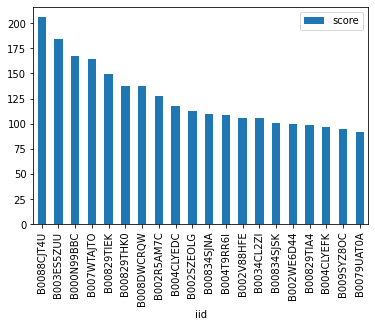

In [52]:
dff_grouped.head(20).plot(kind = "bar", x='iid', y='score')

##### Inference on the output:
1. In the above plot it can be noticed that only one product that is purchased more.
2. There is lot of difference between the first most purchased and second most purchased product.
3. The difference between the most purchased products from third most purchased is not much higherr.
4. The products that appear in this is not same as that of the products in the training data because the entire data is split. 

            As said earlier the process of splitting the data into training and testing is done here to just visualize and check how the logic works.

            Therefore, grouping of the products that have very little difference can be grouped and shown as a recommendatioin, similarly five or ten or requiered no.of recommendations can be made. Orelse, top most consumed products can be recommended induvidually.
            
            But in our system here products in the top order are induvidually recommended.

#### Step 3: Building the recommender:
       Here the products that are ranked top most is fetched upon calling the below function and recommend the same to the user id given while calling the function. 

In [53]:
# A function is built here that fetches the product ids that are in the given n top order and recommended to the user:
def recommendation_poprs_test(user_id, num_recomendations):
    user_recomendation = df_grouped_test.head(num_recomendations)
    user_recomendation['user_id'] = user_id
    col = user_recomendation.columns.tolist()
    cols =  col[-1:] + col[:-1]
    user_recomendation = user_recomendation[cols]
    return pd.DataFrame(user_recomendation[['user_id','iid']])

In [54]:
recommendation_poprs_test('14P637', 5) #Calling the recommender function by inputing the user id and no.of recommendation to be made to the cunsumer.

,user_id,iid
10728,14P637,B003ES5ZUU
16846,14P637,B007WTAJTO
17152,14P637,B0088CJT4U
16997,14P637,B00829TIEK
16994,14P637,B00829THK0


##### Inference on the output:
1. The recommeder system that can fetch the products that are getting highest mean ratings from the users is built.
2. Those fetched products are shown to the consumers to influence them that those are the products that are moving fast in trend and recommend them to purchase the same by saying them the product is also going out-off stock.

-----------------------------------------------------------------------------------------------------------------------------

##### Note:
1. Had seen the two methods it is advisable to deploy Method -1 or Mehod-2's first type(Building popularity based recommendation system on the whole data).


2. But, popularity based recommendation system have a disadvantage:
    1. The system is not personalized - All kind of customers will be recommended with the same kind of electronic items that is purchased more by customers. This will not be useful to retain the customers because within the category of electronic items there are lots of sub categories, one may be intrested in some other category other than the product (belonging to some other category) which is recommended by this popularity based recommendation system.
    
    2. The system also do not help in doing cross selling.
    
    3. Through this type of RS there is no way to connect the sellers directly to the customers.
    
    
    
3. The popularity based recommendation system can be used only in the initial stage of starting the e-commerce platform for our case study, holding this alone for longer period wont gain any profit to the business. But, using this along with other Recommendation system will help in achieve our business objectives.




4. The other recommendation system (RS) available are:
    
      a. Content Based RS: This types of RS avoids the cold-start problem because when a customer search for a product, the products matching to his search product's specificiation or contents are recommended  but the consumer always gets the recommendation only on that particular product only variety of recommendation is not given. The basic idea behind this is " If customer likes a product the customer will like similar item". This system also uses ratings to build the user profile and find similar product profiles. 
      
      b. Classification based RS: Here we create profile of both customer and products, use those features and predict whether a user will like a product or not. But this RS creating model for each product which is highly difficult or challenging. This sytem requires ratings to build the user and product profile in-turn to build a machine learning model to do classification.
      
      c. Collobrative RS: This system have cold start problem but does not requier product profile or user profile because this RS works baed on two methods:
      
             Method-1: In this users those have similar kind of purchase history are treated to have similar tastes so those users are grouped together and get recommendation on products that are purchased additionally by his peers. This system is called user - user based. The similar users are collected based on the ratings they provide to the products 
                 
             Method-2: This RS is also called as Item - Item based similarity recommendation system. The idea in this method is if User A buys product x and y also User B buys product x and y then Product x and y are considered as similar items so if  User X purchases product x he will the user will be recommended with the product y.
           
           
5. There are many other recommendation systems are also available like Market Basket analysis based where concept of association rule mining is used to do the market basketing, Hybrid Recommendation Systems etc., The usage of a recommendation system greatly depends on need, vision and decision of business leaders of a company also it is based on the resources spent in collecting the data and attributes.




6. Having said briefly about the recommendation systems, our analysis base table consists of informations on the product  and user ids also the data of ratings  are available using this we can apply further Collobrative Recommendation system ,which is shown below.

------------------------------------------------------------------------------------------------------------------------------

## Collobrative based Recommendation System ( CRS ):

In collobrative recommendation system there are two Major Categories:

        a. Category-1: Memory Based Collobrative Recommendation System.
        b. Category-2: Model Based Collobrative Recommendation System.

### Category-1: Memory Based Collobrative Recommendation System (Using the algorithms in Surprise package):        

        In this case study we make use of algorithms in the surprise package to construct the recommendation system for both user and item based methods of Memory based Collobrative Recommendation System. There are many algorithms, they are:
        
        1. NormalPredictor algorithm.
        2. BaselineOnly algorithm.
        3. k-NN algorithms:
             a. KNNBasic algorithm.
             b. KNNWithMeans algorithm.
             c. KNNWithZScore algorithm.
             
             Below. Memory based Collobrative Recommendation is built using KNN with means algorithm for both user and item based methods. After building the model using the training data the model is tested uing the testing the data and subjected to evaluation using Mean Squared error, Mean Absolute Error and Root Mean Squared Error.             

### Method -1: User-User based CRS:

                1. The recocommendation system finds the nearset neighbour users (i.e) it finds the users who are similar to the user to whom (User A) the recommendation need to be made. A set of users are said to be Nearest neighbours only if they have purchased similar products and rated the products similarly.
                
                2. The Nearest Neighbours (similar users) are identified by calculating either pearson correlation or cosine similarity but before that in order to remove the bias, ratings given by the user to the products purchased by them is subtracted by the respective user's mean rating. 
                
                3. After finding the Nearesr Neighbours, the items that were already purchased by the User A are removed from the list of products purchased by his neighbours. The mean rating for the remaining products are calculated and sorted in the descending order. 
                
                4. The n products in the top of the order are recommended to the User A stating like "Your peers also purchased..." or "You can also try..." .

#### Step-1: Loading the dataset:

In [64]:
reader = Reader(rating_scale=(1, 5)) #The Reader class is used to parse a file containing ratings.

In [65]:
data = Dataset.load_from_df(df_s[['uid', 'iid', 'Ratings']], reader) #loading the dataset using Surprise package.

##### Inference on the above output:
1. Data is loaded using the function "load_from_df" avialble in the surprise package.
2. Loading the data in this manner makes the data avialble in the format easy for the algorithms of surprise package to work on it easily.

#### Step-2: Splitting  the dataset:

In [104]:
#Splitting the data into training and testing data:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.3) #Splitting the data.

##### Inference on the above output:
1. Data is split using the "train_test_split" function available in the surprise package.
2. 30 percentage of data is split as testing data.
3. Slpitting the data in this manner makes the data avialble in the format easy for the algorithms of surprise package to work on it easily.

#### Step-3: Building the model:

In [105]:
#Building the recommendation system model using Knn with means algorithm having user_based as True.
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset) #Training the model.

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


##### Inference on the above output:
1. Model is built with user_based as True for 50 neighbours.
2. The model is also trained with the training data.

#### Step-3: Predicting and Evaluating the model:

In [106]:
test_pred = algo.test(testset) #Predicting the ratings.
test_pred

[Prediction(uid='AM8W6Y3HVXLZT', iid='B001OMH1JQ', r_ui=4.0, est=3.8780487804878048, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A30R8VFR16RE32', iid='B00JC5Y6YA', r_ui=4.0, est=1.6710569735542045, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A2AY4YUOX2N1BQ', iid='B000YB862E', r_ui=5.0, est=4.567741396592048, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2GKMXRLI7KLFP', iid='B002RLM166', r_ui=1.0, est=4.258986028669035, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1U5IJHJK84S54', iid='B000BDDOP4', r_ui=1.0, est=4.258986028669035, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ABSYIF0ONC2AF', iid='B004H1NEF6', r_ui=4.0, est=3.902439024390244, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2ER8G4JJJ7XER', iid='B002I8MUU0', r_ui=5.0, est=4.34375, details={'actual_k': 0, 'was_impossible': False}),
 Predict

In [107]:
#Evaluating the model:

# Mean Squared Error
print("User-based Model : Mean-Squared-Error")
accuracy.mse(test_pred, verbose=True)

# Root Mean Squared Error
print("User-based Model : Root-Mean-Squared-Error")
accuracy.rmse(test_pred, verbose=True)

# Mean Absolute Error
print("User-based Model : Mean-absolute-error")
accuracy.mae(test_pred, verbose=True)

User-based Model : Mean-Squared-Error
MSE: 1.1100


1.110046430587051

User-based Model : Root-Mean-Squared-Error
RMSE: 1.0536


1.053587410036325

User-based Model : Mean-absolute-error
MAE:  0.7778


0.7778160775636255

##### Inference on the above output:
1. Model is tested using the testing data and subjected to evaluation.
2. Mean absolute error shows much less error compared to other two.
3. But the errors seems to be high.

###  Method 2 - Item-Item based CRS:
        
     1. The recocommendation system finds the nearset neighbour items (i.e) those are the items with similar ratings. 
                
     2. Two or more items are considered to be similar based on cosine similarity or Pearson Correlation but before that in order to remove the bias, ratings obtained by each product is subtracted by the respective product's mean.
                
     3. After finding the Nearest Neighbouring items, before recommending the items to the user the items that were already purchased by the User are removed from the list of Nearest Neighbouring items. The mean rating for the remaining products are calculated and sorted in the descending order. 
                
     4. The n products in the top of the order are recommended to the User stating like "Your peers also purchased.." or "You can also try..." .

#### Step-1: Loading the dataset:

In [64]:
reader = Reader(rating_scale=(1, 5)) #The Reader class is used to parse a file containing ratings.

In [65]:
data = Dataset.load_from_df(df_s[['uid', 'iid', 'Ratings']], reader) #loading the dataset using Surprise package.

##### Inference on the above output:
1. Data is loaded using the function "load_from_df" avialble in the surprise package.
2. Loading the data in this manner makes the data avialble in the format easy for the algorithms of surprise package to work on it easily.

#### Step-2: Splitting  the dataset:

In [100]:
#Splitting the data into training and testing data:
from surprise.model_selection import train_test_split
trainset_item, testset_item = train_test_split(data, test_size=0.3) #Splitting the data.

##### Inference on the above output:
1. Data is split using the "train_test_split" function available in the surprise package.
2. 30 percentage of data is split as testing data.
3. Slpitting the data in this manner makes the data avialble in the format easy for the algorithms of surprise package to work on it easily.

#### Step-3: Building the model:

In [101]:
#Building the recommendation system model using Knn with means algorithm having item_based as True.
algo_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'item_based': True})
algo_item.fit(trainset_item)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


##### Inference on the above output:
1. Model is built with user_based as True for 50 neighbours.
2. The model is also trained with the training data.

#### Step-3: Predicting and Evaluating the model:

In [102]:
#Predicting the ratings.
predictions = algo_item.test(testset_item) 
predictions

[Prediction(uid='A1EXGL6L0QQ0M5', iid='B0053HELF0', r_ui=5.0, est=4.258361801859061, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A36K2N527TXXJN', iid='B0091D44EK', r_ui=4.0, est=4.4519766013588455, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A3TBMAWIIHKHFN', iid='B000MURAT2', r_ui=4.0, est=3.3088235294117645, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3CJ7MHAS9IMAM', iid='B0028D6R54', r_ui=4.0, est=4.258361801859061, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2Y3WWPUKIJ59I', iid='B003P2UMQ2', r_ui=3.0, est=3.857142857142857, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1U11IP6K6NHAK', iid='B00GQOZFNQ', r_ui=5.0, est=4.992857142857143, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1AKW788238PWQ', iid='B0007MWE28', r_ui=5.0, est=4.230769230769231, details={'actual_k': 0, 'was_impossible': False

In [103]:
#Evaluating the model:

# Mean Squared Error
print("User-based Model : Mean-Squared-Error")
accuracy.mse(predictions, verbose=True)

# Root Mean Squared Error
print("User-based Model : Root-Mean-Squared-Error")
accuracy.rmse(predictions, verbose=True)

# Mean Absolute Error
print("User-based Model : Mean-absolute-error")
accuracy.mae(predictions, verbose=True)

User-based Model : Mean-Squared-Error
MSE: 1.0999


1.0999365847178064

User-based Model : Root-Mean-Squared-Error
RMSE: 1.0488


1.0487786156848387

User-based Model : Mean-absolute-error
MAE:  0.7727


0.7727246062775637

##### Inference on the above output:
1. Model is tested using the testing data and subjected to evaluation.
2. Mean absolute error shows much less error compared to other two.
3. But the errors seems to be high.
4. The Errors of item based model is less than the user based model.

### Category 2 - Collobrative filtering (Using SVD method):

         1. Although the memory-based CF is useful in effectively predicting missing ratings and presenting recommendations, it still has a few limitations. 
            
         2. For instance, whenever a recommendation task is conducted, the system has to load all the ratings into the memory and implement specific algorithm based on the complete dataset. Limited by the storage and computing resources, memory-based CF may often become quite time-consuming. 
         
         3. Therefore, recommender system which can provide proper items with acceptable time consumption is highly desired. Model-based CF algorithms are designed to mitigate these problems whose general principle is to use machine learning or data mining approaches to establish prediction models offline. Based on these models, missing ratings can be predicted efficiently. 
             
         4. Typical modelbased algorithms include matrix factorization-based algorithms, clustering-based algorithms, etc.
         
         5. In our case study we use matrix factorization algorithm, in matix factorization method intially we construct rating matrix which consist of ratings for the products given by respective users. This matrix shows the products that are unrated by the user as Nan(we make it zero then).
         
         6. This matrix is decompsed in such way we obtain the characteristcs of the users and items based on the entries in the matrix.
         
         7. Using the characteristics and appropriate algorithms a prediction matrix is constructed.
         
         8. The prediction matrix predicts the ratings for the products that are unrated by a user. This prediction is using the characteristics that was determined by the algorithm.
         
         9. For our case study SVD - Support Vector Decomposition algorithm available in scipy package. 

#### Step - 1: Building Rating Matrix:

In [55]:
ratimx_orginal = df_s.pivot(index='uid', columns='iid', values='Ratings').fillna(0)  #Using Pivot table to build Rating Matrix table.

In [56]:
ratimx_orginal.shape #Extrscting the shape of the rating matrix table.

(1540, 48190)

In [57]:
ratimx_orginal

iid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,...,B00KOLNVAQ,B00KONCDVM,B00KOUIC0Q,B00KPRWAX8,B00KPRWB9G,B00KPXQQK0,B00KR0QHXW,B00KR6FY94,B00KRI1AP4,B00KSBB84S,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

##### Inference on the above output:
1. A matrix table was created containing 1540 customers and 48190 items using the pivot table.
2. The consists of the ratings on the products given by the user.
3. The unrated products are made as zero rating.

#### Step - 2: Matrix Factorization:
   1. In Matrix Factorization method we extract the characteristics of the users and movies to predict the ratings.
   2. Below we use Support Vector Decomposition Method to predict the ratings.
   
##### Note:
1. Inputting the orginal ratting matrix (assume its name is A) into the SVD function decomposes the matrix into three matrices namely U, S, VT.
2. U and VT are orthogonal matrix of (AA^T) and ((A^T)A) respectively .
3. S is a diagonal matrix containing the sqaures of eigen values.

In [58]:
U, S, VT = svds(ratimx_orginal, k=50) #Using Support Vector Decomposition function available in the scipy package.

In [59]:
S_diag = np.diag(S) #Converting the S as Diagonal Matrix
S_diag.shape

(50, 50)

In [60]:
#Understanding the shape of the Matrices:
U.shape
S_diag.shape
VT.shape

(1540, 50)

(50, 50)

(50, 48190)

##### Inference on the above output:
1. A matrix table was created containing 1540 customers and 48190 items using the pivot table.
2. The consists of the ratings on the products given by the user.
3. The unrated products are made as zero rating.

#### Step - 2: Building the prediction Matrix:

In [61]:
pred_matrix = pd.DataFrame(np.dot(np.dot(U,S_diag),VT), columns= ratimx_orginal.columns, index = ratimx_orginal.index) #Taking the dot products of the output of decomposed matrix.
pred_matrix

iid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,...,B00KOLNVAQ,B00KONCDVM,B00KOUIC0Q,B00KPRWAX8,B00KPRWB9G,B00KPXQQK0,B00KR0QHXW,B00KR6FY94,B00KRI1AP4,B00KSBB84S,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,0.002952,0.008525,0.001923,-0.000429,-0.002886,0.003949,0.020008,0.003876,-0.008363,-0.056064,0.006805,-0.004928,0.004677,0.003610,0.030306,-0.000370,0.016971,0.000269,0.020698,-0.002063,-0.000333,0.011196,0.000988,0.003445,0.003703,0.004937,0.009938,0.001626,0.002329,0.005118,0.012393,0.012813,-0.041470,-0.000472,0.003703,0.108809,0.017071,-0.003074,0.017493,0.072490,...,-0.008358,0.002739,-0.013062,0.003603,0.003084,-0.000397,0.011674,0.004264,0.047483,0.002258,-0.062713,-0.004551,0.020934,0.026889,0.000050,0.080949,0.305623,0.023159,0.051055,-0.001275,0.306615,-0.032136,0.003623,0.033317,0.211126,0.021486,-0.000569,-0.012997,0.186545,0.080949,-0.112158,0.028931,0.007026,0.379500,0.158210,0.201766,-0.089726,0.206036,0.013959,-0.063592,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
A100WO06OQR8BQ,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,0.023243,0.004748,0.007898,0.000623,0.005389,-0.003116,-0.013192,-0.008088,0.010724,-0.003728,-0.008536,0.008795,-0.002515,-0.017664,0.000958,-0.000209,0.004533,-0.001912,0.014662,-0.015882,0.003647,-0.003395,-0.001423,0.001034,-0.001213,0.000066,0.007949,0.000794,0.030156,0.008864,-0.000331,0.006791,0.001713,0.000915,-0.001213,0.044320,0.006322,0.001764,-0.039945,-0.044708,...,-0.004232,0.008154,0.089666,-0.007267,0.003279,-0.009229,-0.002075,-0.003221,-0.070171,0.001327,-0.028062,0.069751,0.100250,-0.051989,0.000351,-0.038586,-0.018456,0.012207,-0.090763,0.011983,0.000578,0.004127,0.034131,-0.065956,0.109507,-0.022539,-0.000627,0.038570,-0.088151,-0.038586,0.045624,0.023247,0.008727,-0.021204,-0.017318,-0.015402,0.036499,-0.180672,-0.027860,0.059609,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
A105S56ODHGJEK,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,0.003830,-0.000115,-0.052219,0.000099,-0.001889,-0.001633,-0.009597,-0.002312,0.013302,0.030823,-0.004591,-0.005223,-0.005087,-0.047911,0.011540,0.000369,-0.005437,-0.001589,-0.016260,0.003775,-0.001121,-0.002047,-0.000017,-0.001266,-0.001747,0.000410,-0.006464,0.000288,-0.002617,-0.004736,0.005979,-0.001401,-0.021803,-0.000157,-0.001747,0.002409,0.004060,-0.001603,-0.033086,0.050867,...,-0.005765,0.076541,-0.087089,-0.010226,0.001805,0.002503,-0.001320,-0.000268,0.029783,0.000175,-0.034186,-0.018237,-0.006772,0.073118,-0.000089,-0.043818,0.033330,0.011557,0.075729,0.007235,0.008621,0.112510,-0.011972,-0.058533,-0.043062,0.012472,-0.000213,0.005964,0.107058,-0.043818,-0.032366,0.072784,0.029582,-0.125087,-0.003514,-0.015004,-0.025893,-0.178518,0.020809

##### Inference on the above output:
1. A prediction rating matrix table was created containing 1540 customers and 48190 items using the pivot table which consists the rating of all the products for the users.
2. The matrix was constructed by taking dot product between the U (1540 x 50 dimension matrix) and S_diag ( 50 x 50 dimension matrix) which will give a 1540 x 50 dimension matrix.

#### Step 3: Building the recommender:

In [62]:
def recommendation_cobrs(user_id, ratimx_orginal, pred_matrix):
    num_recomendations = 5
    pred_ratings = pred_matrix.loc[user_id].sort_values(ascending = False)
    orginal_ratings = ratimx_orginal.loc[user_id].sort_values(ascending =False)
    comparision = pd.concat([orginal_ratings, pred_ratings], axis=1)
    comparision.index.name = 'Recommended Items'
    comparision.columns = ['user_given_ratings', 'Predicted_Ratings']
    comparision = comparision.loc[comparision.user_given_ratings == 0]   
    comparision = comparision.sort_values('Predicted_Ratings', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(user_id))
    print(comparision.head(num_recomendations))

In [63]:
user_id = 'A3M7R4PD0FEPUB'
recommendation_cobrs(user_id, ratimx_orginal, pred_matrix) #Calling the recommender function.


Below are the recommended items for user(user_id = A3M7R4PD0FEPUB):

                   user_given_ratings  Predicted_Ratings
Recommended Items                                       
B00829TIEK                        0.0           1.066039
B00834SJNA                        0.0           0.890723
B008DWCRQW                        0.0           0.671317
B004CLYEDC                        0.0           0.563443
B00834SJSK                        0.0           0.551841


##### Inference on the above output:
1. Here the Unrated products by a user is fetched from the orginal matrix and predicted ratings for those products are fetched from prediction matrix.

2. Those products are sorted in descending order and top n products are recommended to the users. 

=======================================================================================================================

#### Conclusion:
1. Initially the data of the case study was well understood by exploring the data.

2. Then data was made less denser.

3. The data was understood clearly and got a clear picture on it to build recommendation systems.

4. Brief note on various Recommender system was also given.

5. Having mentioned briefly about the few recommendation systems let us find the suitable recommendation system for our case study:  

        1. We can use Popularity Recommendation System based on the decision of the business leader but it is not personalized.
        
        2. With the avaiable data to make the recommendation system personalized we can go for collobrative recommendation system but it have grey sheep problem and item based recommendation should be applied after classifying the electronics items and apply the recommendation for each class seperately apart from this the other problems with the system are data sparsity, calability and cold-start problem. 
        
        3. Had we got the contents related to the products we could have built a content based recommender system so that we can overcome the problem of cold start and data sparsity but the problem overhere is a there will be no variety in the products recommendad.
        
        4. To  overcome the above problems we can better go for Hybrid recommender systems where we can combine all recommender system together and recommend things from all recommender system or have some weightage on the recommendation systems and recommend the items from the sytem that crosses the threshold or alternate the recommender systems based on the situations/cases and recommend the items suitably. 
        
6. Having things said above we can use Hybrid recommendation system which will yield a better result.

7. Final decision is based on the business leader.


=======================================================================================================================